Supermart Grocery Sales- Retail Analytics Dataset


STEP 1 : IMPORTING LIBRARIES

In [6]:
import pandas as p 
import numpy as n 
import matplotlib.pyplot as m 
import seaborn as s 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import yfinance as f 


STEP 2 : LOADING THE DATASET

In [7]:
store = p.read_csv(r'C:\Users\Aayush\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [8]:
store.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


STEP 3(1) : CHECKING THE MISSING VALUE ARE NOT 

In [14]:
store.isnull().sum()
# Check for duplicates
#store.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

STEP 3(2) : convert date column  into date and time

In [21]:
store['Order Date'] = p.to_datetime(store['Order Date'], format='mixed')
# Extract day, month, and year from 'Order Date'
store['Order Day'] = store['Order Date'].dt.day
store['Order Month'] = store['Order Date'].dt.month
store['Order Year'] = store['Order Date'].dt.year

In [22]:
store.info()
store.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


Step 3(3): Label Encoding (for ML model later)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Category', 'Sub Category', 'City', 'Region', 'State']:
    store[col] = le.fit_transform(store[col])


4(1) : Distribution of Sales by Category

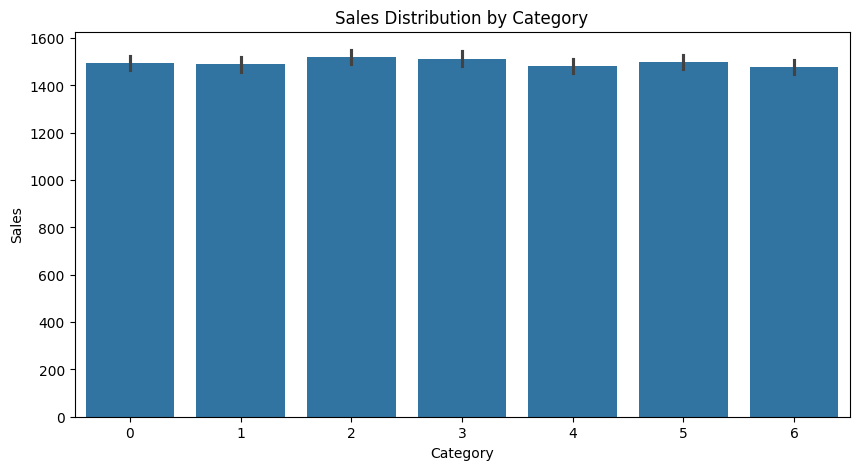

In [37]:
m.figure(figsize=(10,5))
s.barplot(x='Category',y='Sales',data = store)
m.title('Sales Distribution by Category')
m.xlabel('Category')
m.ylabel('Sales')
m.show()


4(2) :  Sales Trends Over Time

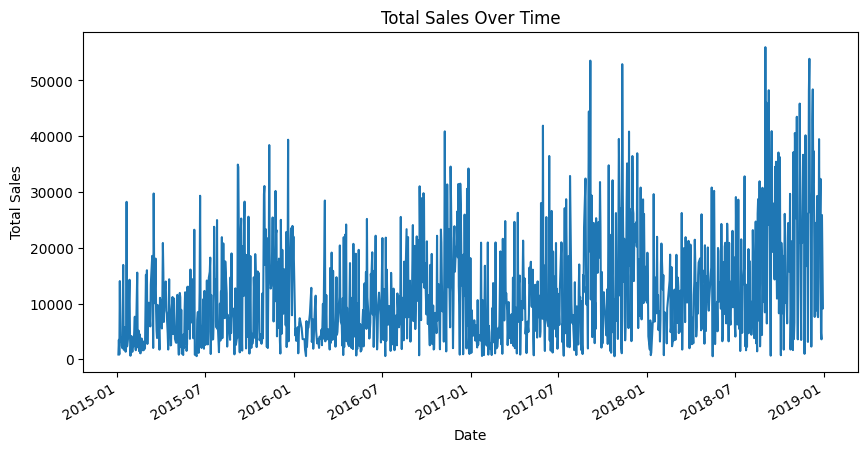

In [27]:
m.figure(figsize=(10,5))
store.groupby('Order Date')['Sales'].sum().plot()
m.title('Total Sales Over Time')
m.xlabel('Date')
m.ylabel('Total Sales')
m.show()

4(3) Correlation Heatmap

In [28]:
m.figure(figsize=(10,5))
corr_matrix = store.corr()
s.heatmap(corr_matrix, annot=True, cmap='coolwarm')
m.title('Correlation Heatmap')
m.show()

ValueError: could not convert string to float: 'OD1'

<Figure size 1200x600 with 0 Axes>

STEP 5 :  ML Model Building – Predicting Sales

In [30]:
# Select features and target variable
features = store.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])
target = store['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Step 6: Train a Linear Regression Model

In [31]:
 # Initialize the model
model = LinearRegression()
 # Train the model
model.fit(X_train, y_train)
 # Make predictions
y_pred = model.predict(X_test)

Step 7: Evaluate the Model

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 213030.68736916437
R² Score: 0.35409350805366546


STEP 8 : Visualization – Actual vs Predicted

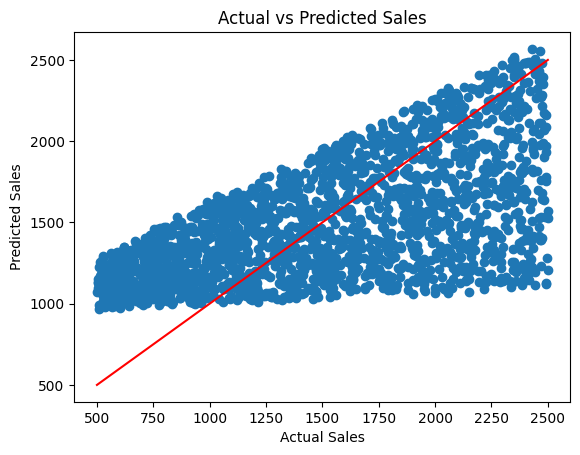

In [33]:
m.scatter(y_test, y_pred)
m.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
m.xlabel('Actual Sales')
m.ylabel('Predicted Sales')
m.title('Actual vs Predicted Sales')
m.show()
